# Simple Linear Regression (Gradient Descent)

Objective:

* Implement a simple linear regression model

---
Lab - Simple Linear Regression

**Mathematical Models**

*Function of line*
$$ y = mx + b $$

*Mean Squared Error (MSE)*
$$ MSE = \frac{1}{n} \sum_{i=0}^n (y_i - \hat y_i)^2  $$

*Predicted*
$$ \hat y_i = mx_i+b  $$

$$ MSE = \frac{1}{n} \sum_{i=0}^n (y_i - (mx_i+b))^2  $$

$$ J = \frac{1}{n} * \sum_{i=0}^n(y_i - (m*x_i + b))^2$$

*The gradients (partial derivatives)*
$$ \frac{∂J}{∂m} = \frac{-2}{n} * \sum_{i=0}^nx_i(y_i - (m*x_i + b))$$

$$ \frac{∂J}{∂b} = \frac{-2}{n} * \sum_{i=0}^n(y_i - (m*x_i + b))$$

$$ m = m - (learning rate * \frac{∂J}{∂m})$$
$$ b = b - (learning rate * \frac{∂J}{∂b})$$

## 1. Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2.  Simple Linear Regression GD

In [35]:
class SimpleLinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.slope = None
        self.intercept = None
        self.cost_history = []  # To track cost function over iterations
    
    def fit(self, X, y):
        # Convert inputs to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # Initialize parameters (slope and intercept)
        self.slope = 0
        self.intercept = 0
        n = len(X)  # Number of samples
        
        # Gradient descent
        for _ in range(self.n_iterations):
            # Current predictions
            y_pred = self.slope * X + self.intercept
            
            # Calculate gradients
            slope_grad = (-2/n) * np.sum(X * (y - y_pred))
            intercept_grad = (-2/n) * np.sum(y - y_pred)
            
            # Update parameters
            self.slope -= self.learning_rate * slope_grad
            self.intercept -= self.learning_rate * intercept_grad
            
            # Calculate and store cost (MSE)
            cost = np.mean((y - y_pred) ** 2)
            self.cost_history.append(cost)
            
        return self
    
    def predict(self, X):
        if self.slope is None or self.intercept is None:
            raise Exception("Model has not been fitted yet. Call fit() first.")
            
        return self.slope * np.array(X) + self.intercept
    
    def mse(self, y_true, y_pred):
        return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)

## 3. Model Training

In [36]:
df = pd.read_csv('data/FuelConsumptionCo2.csv')

x = df.ENGINESIZE.to_numpy()
y = df.CO2EMISSIONS.to_numpy()

In [44]:
model = SimpleLinearRegressionGD(learning_rate=0.01, n_iterations=2100)
model.fit(x, y)

In [45]:
predictions = model.predict(x)

# Print model parameters
print(f"Slope (m): {model.slope:.2f}")
print(f"Intercept (b): {model.intercept:.2f}")
print(f"Final MSE: {model.mse(y, predictions):.2f}")

Slope (m): 39.19
Intercept (b): 125.03
Final MSE: 946.33


## 4. Plot

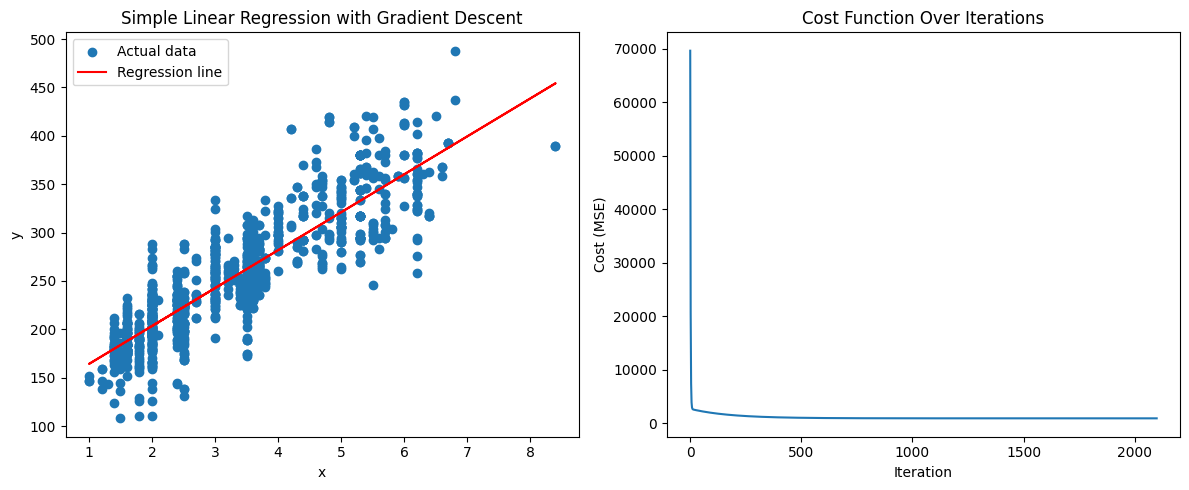

In [46]:
# Plot the results
plt.figure(figsize=(12, 5))

# Regression line
plt.subplot(1, 2, 1)
plt.scatter(x, y, label='Actual data')
plt.plot(x, predictions, color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression with Gradient Descent')
plt.legend()

# Cost function over iterations
plt.subplot(1, 2, 2)
plt.plot(range(model.n_iterations), model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Over Iterations')

plt.tight_layout()
plt.show()